In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load in Dataframe
df = pd.read_csv('../Data/train.csv')

In [3]:
# Define Variables
x = df[['GrLivArea', 'GarageArea', 'TotalBsmtSF']]
y = df['SalePrice']
print(x)
print(y)

      GrLivArea  GarageArea  TotalBsmtSF
0          1710         548          856
1          1262         460         1262
2          1786         608          920
3          1717         642          756
4          2198         836         1145
...         ...         ...          ...
1455       1647         460          953
1456       2073         500         1542
1457       2340         252         1152
1458       1078         240         1078
1459       1256         276         1256

[1460 rows x 3 columns]
0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


In [4]:
# Split into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [5]:
# Train the model on the training set
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(x_train, y_train)

LinearRegression()

In [6]:
# Predict the tet set results
ml.fit(x_test, y_test)
y_pred = ml.predict(x_test)

In [7]:
# Test the model
ml.predict([[1710, 548, 856]])

array([194349.78625651])

In [8]:
# Evaluate the model
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
# Note: look into mean squared error

0.5793572419516679

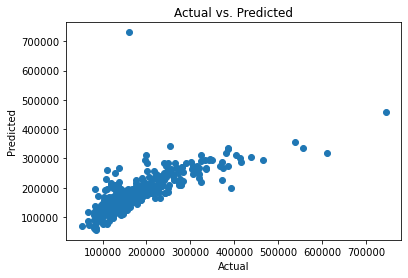

In [9]:
# Plot the results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()
# Pretty good, except for one value completely throwing it off -- look into that
# Prices of more expensive houses are generally underestimated

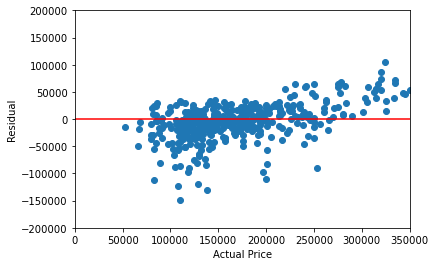

In [10]:
# Plot the residuals
resid = y_test - y_pred
plt.scatter(y_test, resid)
plt.xlabel('Actual Price')
plt.ylabel('Residual')
plt.axhline(y=0, color='r', linestyle='-')
plt.xlim([0, 350000])
plt.ylim([-200000,200000])
plt.show()
# Seems to slightly overestimate cheaper houses, slightly underestimate more expensive ones

In [11]:
# Predicted values
pred_y_df = pd.DataFrame({'Observed': y_test, 'Predicted':y_pred, 'Residual': y_test - y_pred})
pred_y_df[0:20]

,Observed,Predicted,Residual
529,200624,283987.689253,-83363.689253
491,133000,153334.916743,-20334.916743
459,110000,136476.542344,-26476.542344
279,192000,221623.515203,-29623.515203
655,88000,113710.122142,-25710.122142
1013,85000,129142.201004,-44142.201004
1403,282922,222085.717862,60836.282138
601,141000,169353.074091,-28353.074091
1182,745000,457546.734685,287453.265315
687,148800,136768.286985,12031.713015


In [12]:
# Calculate VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_df = pd.read_csv('../Data/train.csv')
test_variables = vif_df[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF']]
vif_data = pd.DataFrame()
vif_data['Variable'] = test_variables.columns
vif_data['VIF'] = [variance_inflation_factor(test_variables.values, i) for i in range(len(test_variables.columns))]
print(vif_data)
# GrLivArea has the lowest VIF --> good variable to use

      Variable        VIF
0  OverallQual  24.482179
1    GrLivArea  17.831428
2   GarageCars  32.418613
3   GarageArea  28.552045
4  TotalBsmtSF  22.332893
5     1stFlrSF  32.817377
